# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{cities}")
print(f"Number of cities in the list: {len(cities)}")

['pangody', 'hawaiian paradise park', 'humaita', 'vilyuchinsk', 'puerto san carlos', 'port elizabeth', "nar'yan-mar", 'torghay', 'crane', 'san blas', 'iqaluit', 'port lincoln', 'lhasa', 'tranovaho', 'west island', 'murzuq', 'ula', 'hasaki', 'uturoa', 'port-aux-francais', 'pingliang', 'waitangi', 'college', 'papatowai', 'kirensk', 'enewetak', 'sisimiut', 'whakatane', 'berdigestyakh', 'avarua', 'vadso', 'ushuaia', 'anadyr', 'isafjordur', 'pyin oo lwin', 'ribeira grande', 'albany', 'invercargill', 'adamstown', 'howrah', 'puerto natales', 'blackmans bay', 'taiohae', 'bredasdorp', 'bratsk', 'vorkuta', 'georgetown', 'atafu village', 'selfoss', 'suixi', 'wailua homesteads', 'nemuro', 'illizi', 'whitehorse', 'angaur state', 'bilibino', 'tralee', 'jackson', 'ancud', 'callao', 'cannonvale', 'calgary', 'grytviken', 'ilulissat', 'al kharijah', 'hithadhoo', 'porto novo', 'rapar', 'la ronge', 'shingu', 'hermanus', 'tiksi', 'edinburgh of the seven seas', 'grootfontein', 'naze', 'linkou', 'laredo', 'r

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangody
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | humaita
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | torghay
Processing Record 9 of Set 1 | crane
Processing Record 10 of Set 1 | san blas
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | lhasa
Processing Record 14 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | murzuq
Processing Record 17 of Set 1 | ula
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | pingliang


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df  = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangody,65.8500,74.4859,258.07,75,80,10.66,RU,1702844779
1,hawaiian paradise park,19.5933,-154.9731,297.88,76,75,4.63,US,1702844780
2,humaita,-7.5061,-63.0208,302.47,69,90,2.08,BR,1702844780
3,vilyuchinsk,52.9306,158.4028,273.30,91,100,17.94,RU,1702844780
4,port elizabeth,-33.9180,25.5701,292.09,85,54,6.37,ZA,1702844780


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangody,65.8500,74.4859,258.07,75,80,10.66,RU,1702844779
1,hawaiian paradise park,19.5933,-154.9731,297.88,76,75,4.63,US,1702844780
2,humaita,-7.5061,-63.0208,302.47,69,90,2.08,BR,1702844780
3,vilyuchinsk,52.9306,158.4028,273.30,91,100,17.94,RU,1702844780
4,port elizabeth,-33.9180,25.5701,292.09,85,54,6.37,ZA,1702844780


In [8]:
# Get the information on the DataFrame
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 564
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        565 non-null    object 
 1   Lat         565 non-null    float64
 2   Lng         565 non-null    float64
 3   Max Temp    565 non-null    float64
 4   Humidity    565 non-null    int64  
 5   Cloudiness  565 non-null    int64  
 6   Wind Speed  565 non-null    float64
 7   Country     560 non-null    object 
 8   Date        565 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 44.1+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

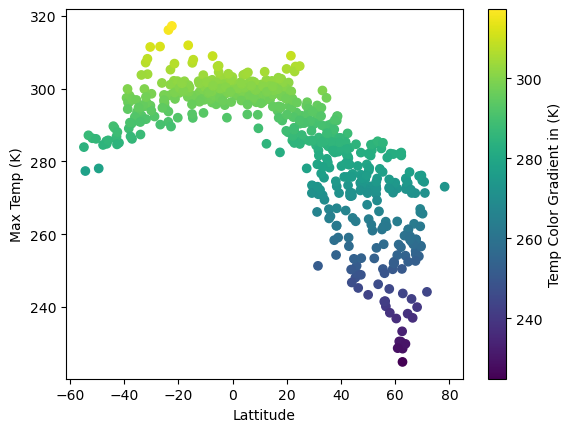

<Figure size 640x480 with 0 Axes>

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df["Max Temp"],c=city_data_df['Max Temp'])
clb1 = plt.colorbar()
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (K)")
clb1.set_label("Temp Color Gradient in (K)")
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

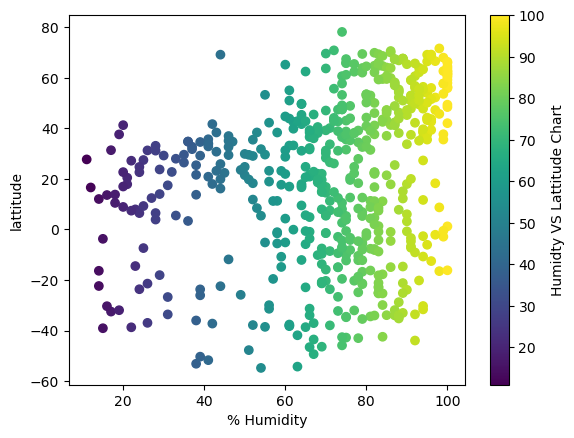

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"],city_data_df['Lat'],c=city_data_df['Humidity'])
clb2 = plt.colorbar()


# Incorporate the other graph properties
plt.xlabel("% Humidity")
plt.ylabel("lattitude")
clb2.set_label("Humidty VS Lattitude Chart")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

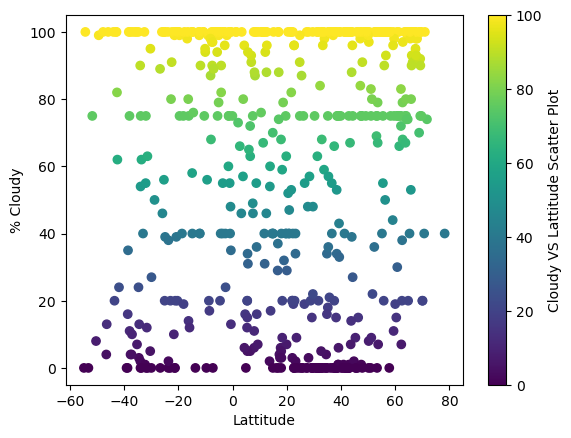

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df["Cloudiness"],c=city_data_df['Cloudiness'])
clb3 = plt.colorbar()


# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("% Cloudy")
clb3.set_label("Cloudy VS Lattitude Scatter Plot")

# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()





#### Latitude vs. Wind Speed Plot

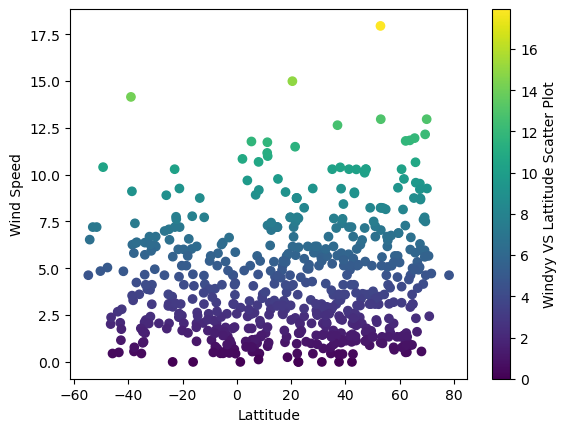

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df["Wind Speed"],c=city_data_df['Wind Speed'])
clb4 = plt.colorbar()


# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
clb4.set_label("Windyy VS Lattitude Scatter Plot")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
import scipy.stats as st
Lattitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
cloud = city_data_df['Cloudiness']
humid = city_data_df['Humidity']
temp = city_data_df['Max Temp']
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(wind,Lattitude)[0],2)}")
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(cloud,Lattitude)[0],2)}")
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(humid,Lattitude)[0],2)}")
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(temp,Lattitude)[0],2)}")


The correlation coefficient between wind speed and lattitude is 0.11
The correlation coefficient between wind speed and lattitude is 0.09
The correlation coefficient between wind speed and lattitude is 0.27
The correlation coefficient between wind speed and lattitude is -0.7


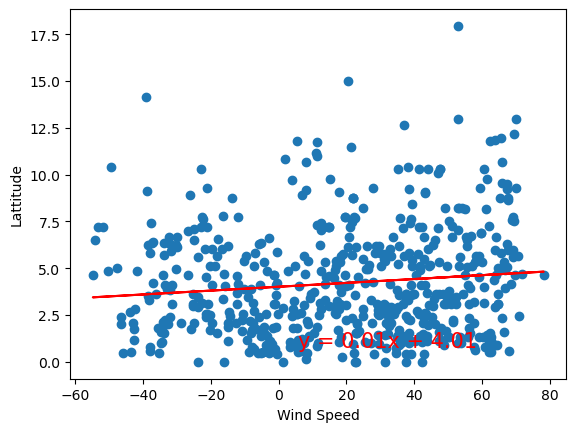

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Add the linear regression equation and line to plot
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lattitude')
plt.show()


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the first few rows of the new DataFrame to verify
print(northern_hemisphere_df.head())



                           City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
0                       pangody  65.8500   74.4859    258.07        75   
1        hawaiian paradise park  19.5933 -154.9731    297.88        76   
3                   vilyuchinsk  52.9306  158.4028    273.30        91   
5                   nar'yan-mar  67.6713   53.0870    258.55        89   
6                       torghay  49.6339   63.4981    268.10        64   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                80       10.66      RU  1702844779  
1                75        4.63      US  1702844780  
3               100       17.94      RU  1702844780  
5                93        8.73      RU  1702844780  
6               100        3.46      KZ  1702844781  


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] <= 0]

# Display the first few rows of the new DataFrame to verify
print(southern_hemisphere_df.head())

# Display sample data
southern_hemisphere_df.head()

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
2               humaita  -7.5061  -63.0208    302.47        69          90   
4        port elizabeth -33.9180   25.5701    292.09        85          54   
10         port lincoln -34.7333  135.8667    292.79        75         100   
12          west island -12.1568   96.8225    299.14        78          40   
16               uturoa -16.7333 -151.4333    300.30        79          98   

         Wind Speed Country        Date  
City_ID                                  
2              2.08      BR  1702844780  
4              6.37      ZA  1702844780  
10             1.02      AU  1702844782  
12             3.09      CC  1702844782  
16             6.03      PF  1702844783  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,humaita,-7.5061,-63.0208,302.47,69,90,2.08,BR,1702844780
4,port elizabeth,-33.9180,25.5701,292.09,85,54,6.37,ZA,1702844780
10,port lincoln,-34.7333,135.8667,292.79,75,100,1.02,AU,1702844782
12,west island,-12.1568,96.8225,299.14,78,40,3.09,CC,1702844782
16,uturoa,-16.7333,-151.4333,300.30,79,98,6.03,PF,1702844783


###  Temperature vs. Latitude Linear Regression Plot

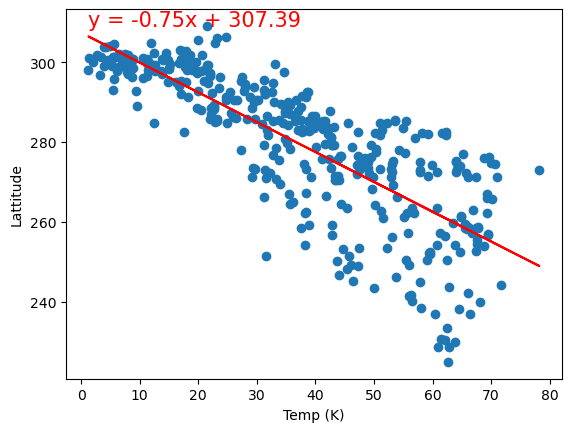

In [52]:
# Linear regression on Northern Hemisphere
#####################################################
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values), max(y_values)),fontsize=15,color="red")
plt.xlabel('Temp (K)')
plt.ylabel('Lattitude')
plt.show()


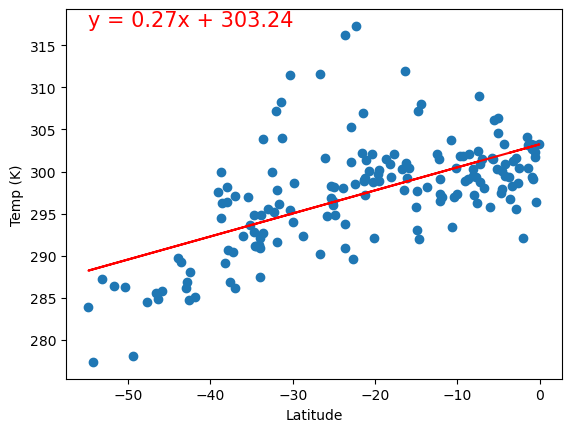

In [51]:
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Temp (K)')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

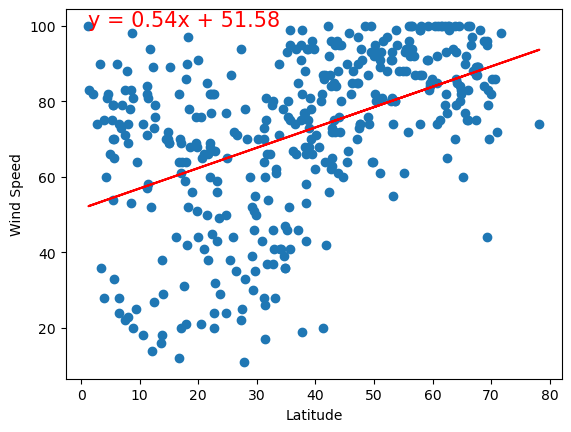

In [42]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

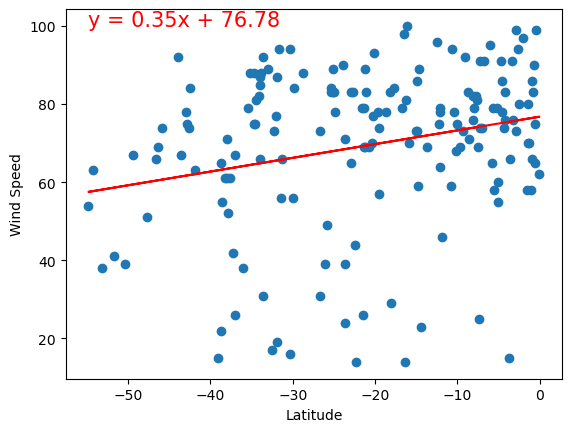

In [43]:
# Southern Hemisphere

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

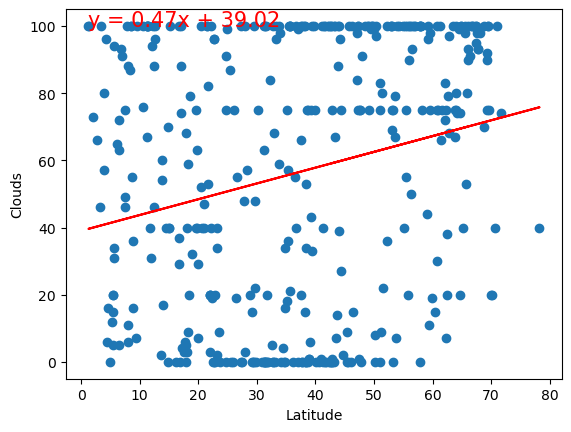

In [45]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Clouds')

plt.show()

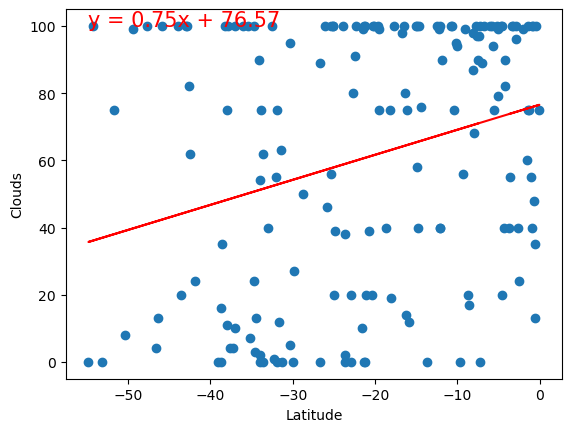

In [46]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Clouds')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

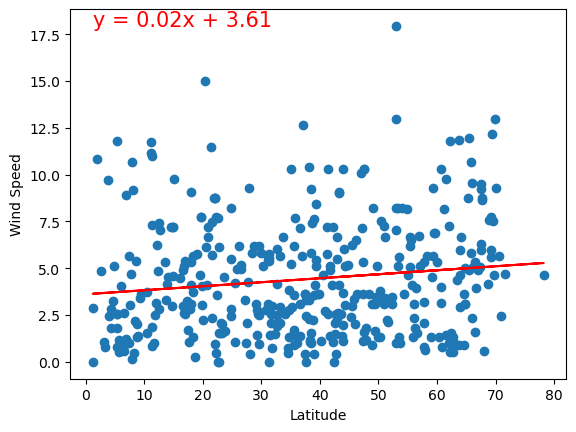

In [47]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

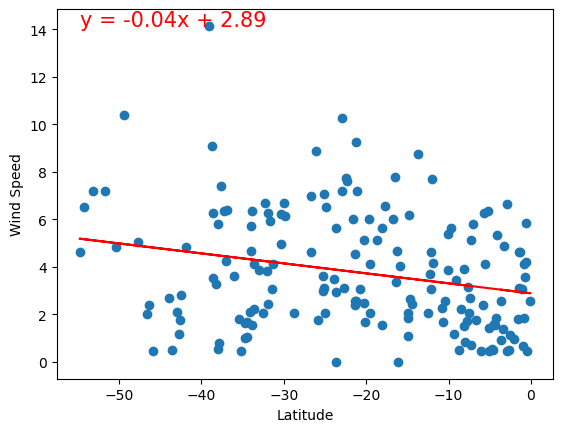

In [49]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE